In [43]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('New Taipei City 105 A2 Road Traffic _ Traducido.csv')

In [19]:
df

,age;status_class;status_type;year;count
0,0~5;Arranque;Vehículo;105;0
1,6~11;Arranque;Vehículo;105;2
2,12;Arranque;Vehículo;105;0
3,13;Arranque;Vehículo;105;0
4,14;Arranque;Vehículo;105;0
...,...
520,75~79;Desconocido;Desconocido;105;22
521,80~84;Desconocido;Desconocido;105;14
522,85~89;Desconocido;Desconocido;105;4
523,90~;Desconocido;Desconocido;105;3


In [20]:


# Separar la columna 'age;status_class;status_type;year;count' en varias columnas
df[['age', 'status_class', 'status_type', 'year', 'count']] = df['age;status_class;status_type;year;count'].str.split(';', expand=True)

# Convertir las columnas numéricas a tipos apropiados
df['count'] = pd.to_numeric(df['count'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Eliminar la columna original
df.drop(columns=['age;status_class;status_type;year;count'], inplace=True)

# Verificar el resultado
df.head()

# Limpiar posibles valores nulos o incoherentes
df.fillna(0, inplace=True)

In [21]:
df

,age,status_class,status_type,year,count
0,0~5,Arranque,Vehículo,105,0
1,6~11,Arranque,Vehículo,105,2
2,12,Arranque,Vehículo,105,0
3,13,Arranque,Vehículo,105,0
4,14,Arranque,Vehículo,105,0
...,...,...,...,...,...
520,75~79,Desconocido,Desconocido,105,22
521,80~84,Desconocido,Desconocido,105,14
522,85~89,Desconocido,Desconocido,105,4
523,90~,Desconocido,Desconocido,105,3


<ipython-input-10-e77c814df0a4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_valid_74, x='age', y='count', palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26126 (\N{CJK UNIFIED IDEOGRAPH-660E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


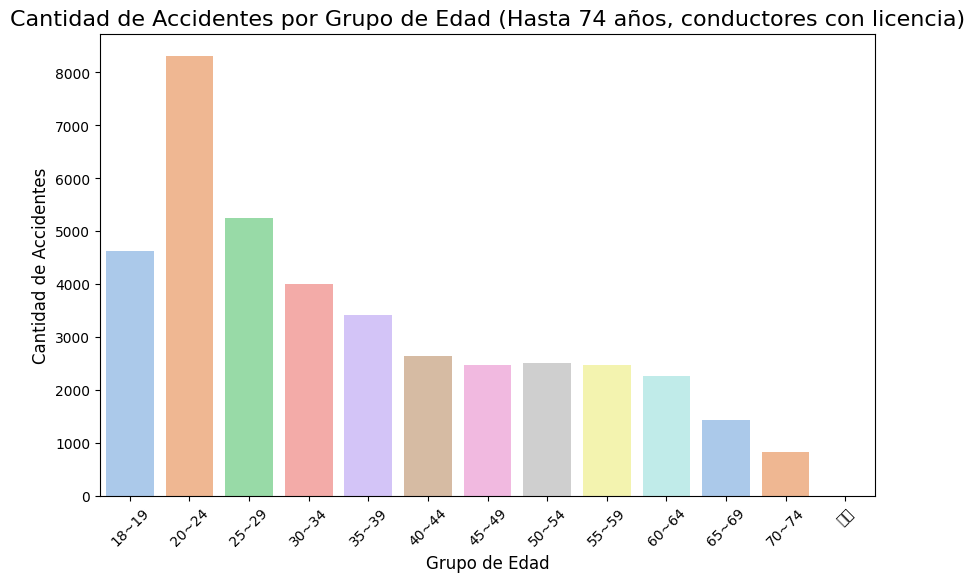

In [10]:
# Filtrar los grupos de edad que son menores o iguales a 74 años
age_valid_74 = df[~df['age'].isin(['0~5', '6~11', '12', '13', '14', '15', '16', '17', '75~79', '80~84', '85~89', '90~'])]

# Agrupar por grupo de edad y contar los accidentes
age_group_valid_74 = age_valid_74.groupby('age')['count'].sum().reset_index()

# Ordenar los grupos de edad para una mejor visualización
age_group_valid_74 = age_group_valid_74.sort_values(by='age')

# Configurar gráfico
plt.figure(figsize=(10,6))
sns.barplot(data=age_group_valid_74, x='age', y='count', palette='pastel')

# Título y etiquetas
plt.title('Cantidad de Accidentes por Grupo de Edad (Hasta 74 años, conductores con licencia)', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Cantidad de Accidentes', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-3455df6726d5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtrado, x='age', y='count', palette='pastel')


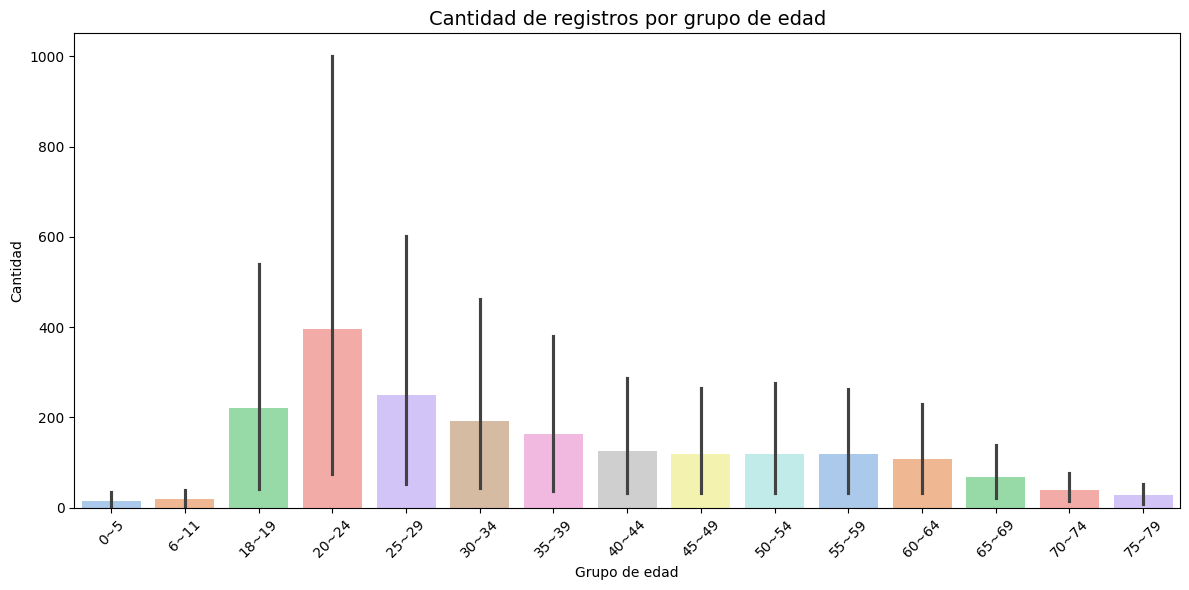

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar edades hasta 74 años
df_filtrado = df[df['age'].str.contains('^[0-7][0-9]~|^[0-6]~', regex=True)]

plt.figure(figsize=(12,6))
sns.barplot(data=df_filtrado, x='age', y='count', palette='pastel')
plt.title('Cantidad de registros por grupo de edad', fontsize=14)
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


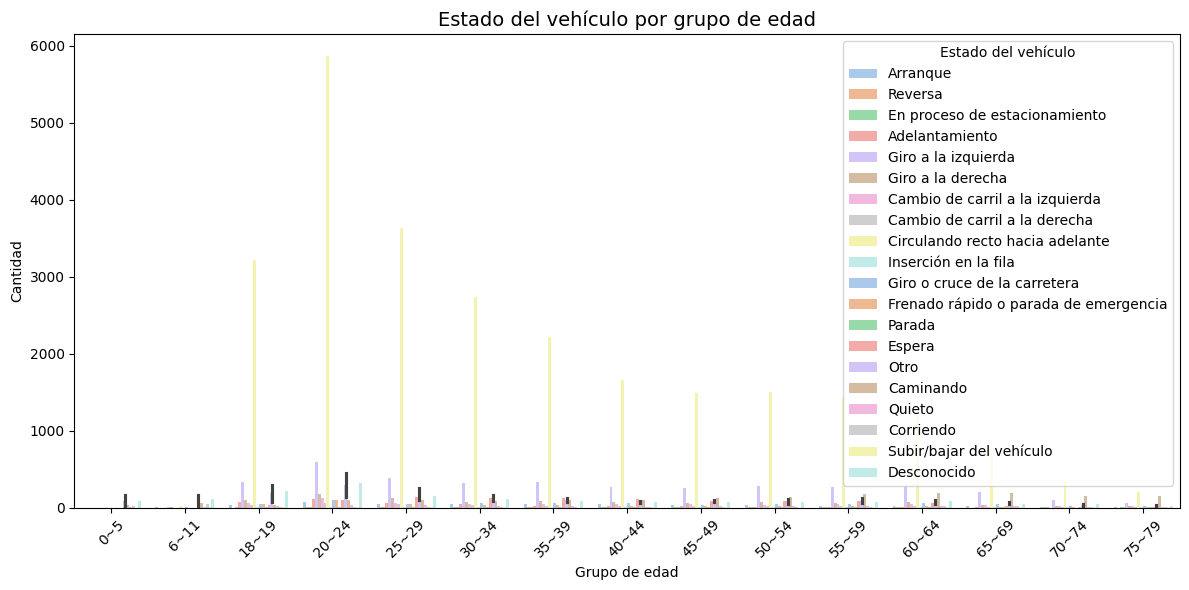

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_filtrado, x='age', y='count', hue='status_class', palette='pastel')
plt.title('Estado del vehículo por grupo de edad', fontsize=14)
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Estado del vehículo')
plt.tight_layout()
plt.show()


In [38]:
# Ver las columnas del DataFrame
print(df.columns)

# Ver las primeras filas del DataFrame para verificar los datos
print(df.head())


Index(['age', 'status_class', 'status_type', 'year', 'count', 'age_group'], dtype='object')
    age status_class status_type  year  count age_group
2  12.0     Arranque    Vehículo   105      0       NaN
3  13.0     Arranque    Vehículo   105      0       NaN
4  14.0     Arranque    Vehículo   105      0       NaN
5  15.0     Arranque    Vehículo   105      0       NaN
6  16.0     Arranque    Vehículo   105      0       NaN


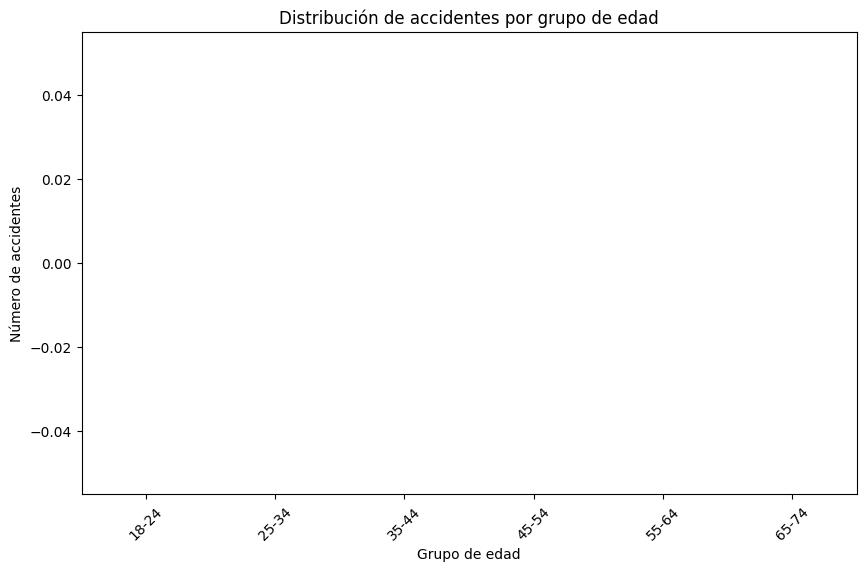

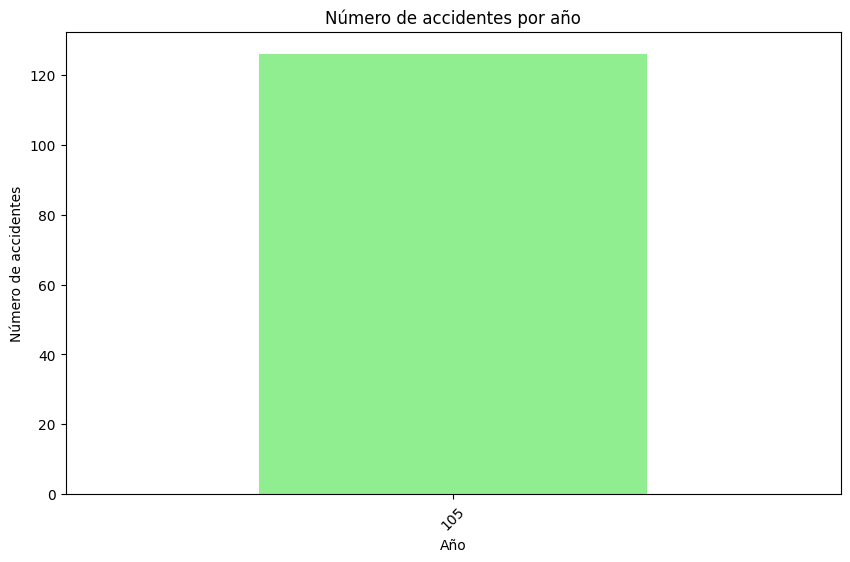

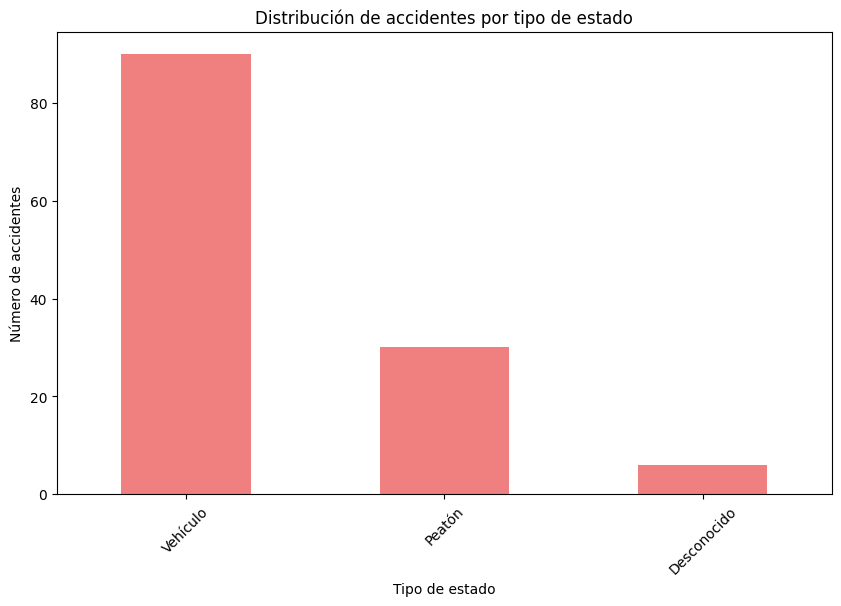

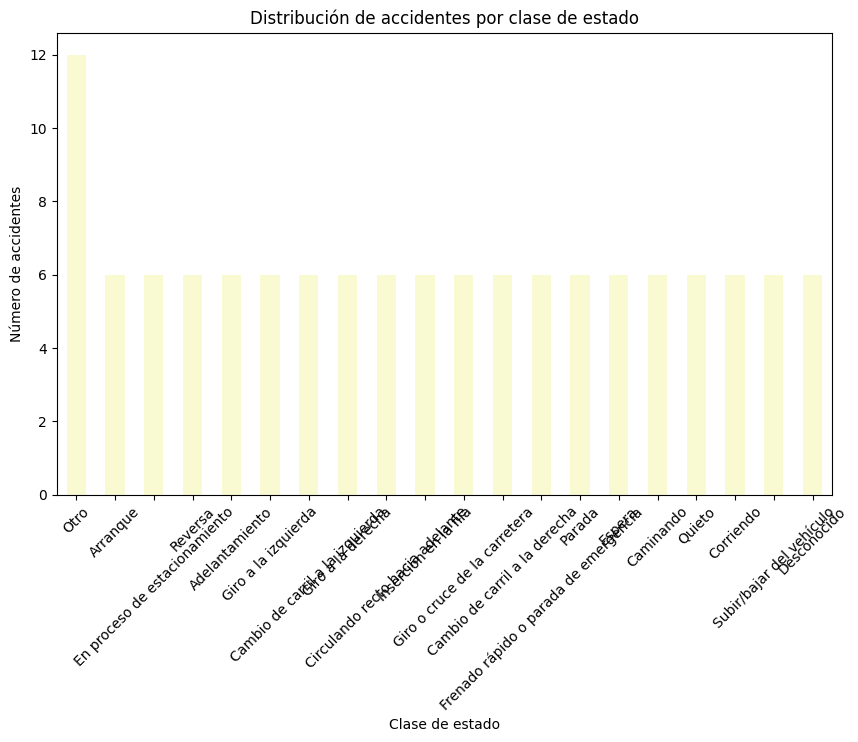

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de tener el dataset cargado
# df = pd.read_csv('tu_dataset.csv') # Si necesitas cargarlo

# 1. Distribución de accidentes por grupo de edad
plt.figure(figsize=(10, 6))
df['age_group'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Distribución de accidentes por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.show()

# 2. Accidentes por año
plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Número de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.show()

# 3. Distribución de accidentes por tipo de estado
plt.figure(figsize=(10, 6))
df['status_type'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribución de accidentes por tipo de estado')
plt.xlabel('Tipo de estado')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.show()

# 4. Distribución de accidentes por clase de estado
plt.figure(figsize=(10, 6))
df['status_class'].value_counts().plot(kind='bar', color='lightgoldenrodyellow')
plt.title('Distribución de accidentes por clase de estado')
plt.xlabel('Clase de estado')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.show()


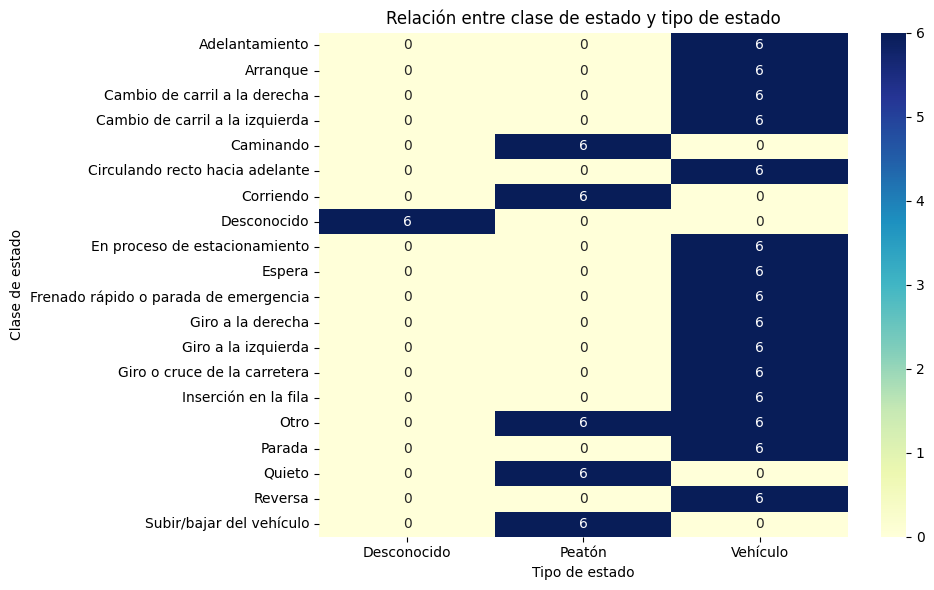

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tabla cruzada entre status_type y status_class
tabla_cruzada = pd.crosstab(df['status_class'], df['status_type'])

# Gráfico de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_cruzada, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre clase de estado y tipo de estado')
plt.xlabel('Tipo de estado')
plt.ylabel('Clase de estado')
plt.tight_layout()
plt.show()


<ipython-input-41-5a5431b9a879>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tipo_accidente, x='status_type', y='count', palette='viridis')


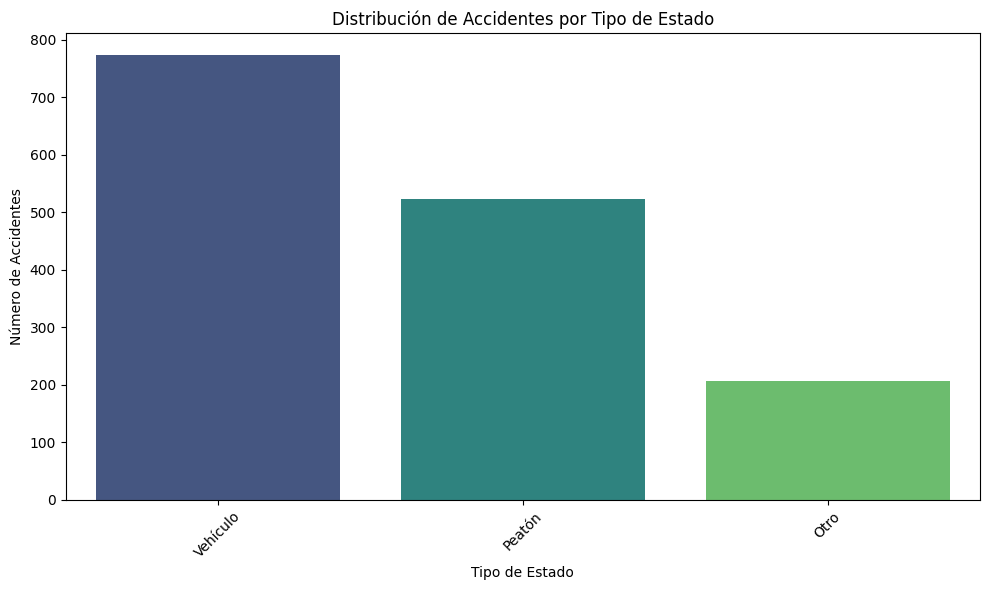

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una copia para no alterar el original
df_modificado = df.copy()

# Reemplazar "Desconocido" por "Otro" en la columna 'status_type'
df_modificado['status_type'] = df_modificado['status_type'].replace('Desconocido', 'Otro')

# Agrupar los datos por tipo de estado y sumar la cantidad de accidentes
tipo_accidente = df_modificado.groupby('status_type')['count'].sum().reset_index()

# Ordenar de mayor a menor para mejorar visualización
tipo_accidente = tipo_accidente.sort_values(by='count', ascending=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=tipo_accidente, x='status_type', y='count', palette='viridis')
plt.title('Distribución de Accidentes por Tipo de Estado')
plt.xlabel('Tipo de Estado')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:


# Preparar los datos con "Otro" en lugar de "Desconocido"
df_modificado = df.copy()
df_modificado['status_type'] = df_modificado['status_type'].replace('Desconocido', 'Otro')
tipo_accidente = df_modificado.groupby('status_type')['count'].sum().reset_index()

# Ordenar
tipo_accidente = tipo_accidente.sort_values(by='count', ascending=False)

# Estilo de gráfico
plt.style.use('seaborn-whitegrid')
colors = sns.color_palette('Set2', len(tipo_accidente))

# Crear gráfico de dona
plt.figure(figsize=(8, 8))
plt.pie(tipo_accidente['count'], labels=tipo_accidente['status_type'], colors=colors,
        startangle=90, autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.4))

# Círculo central para el efecto de dona
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Título y presentación
plt.title('Distribución de Accidentes por Tipo de Estado', fontsize=14)
plt.tight_layout()
plt.show()


OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

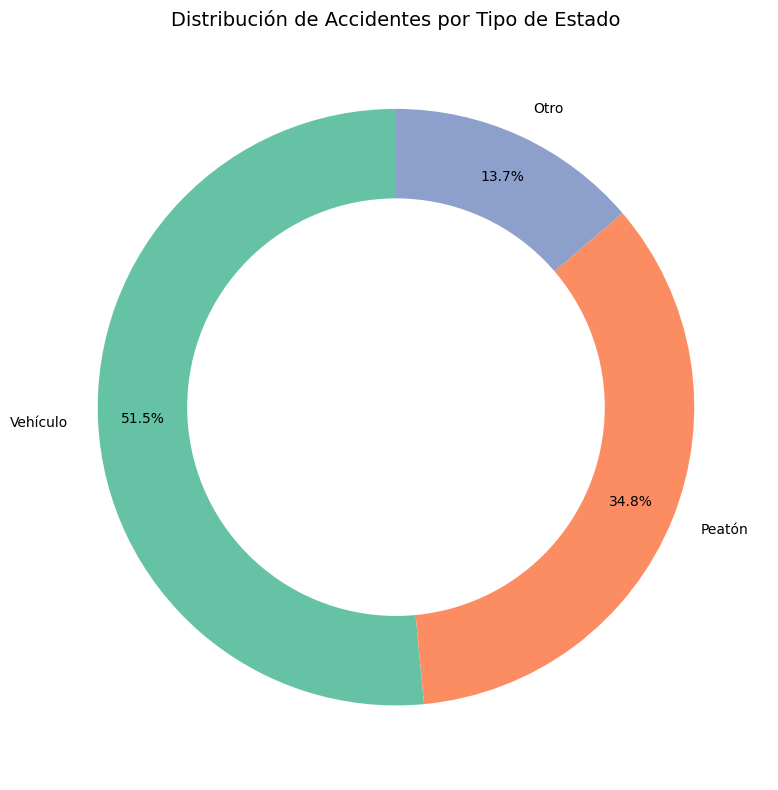

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copiar y reemplazar "Desconocido" por "Otro"
df_modificado = df.copy()
df_modificado['status_type'] = df_modificado['status_type'].replace('Desconocido', 'Otro')
tipo_accidente = df_modificado.groupby('status_type')['count'].sum().reset_index()

# Ordenar por frecuencia
tipo_accidente = tipo_accidente.sort_values(by='count', ascending=False)

# Estilo disponible
plt.style.use('ggplot')
colors = sns.color_palette('Set2', len(tipo_accidente))

# Crear gráfico de dona
plt.figure(figsize=(8, 8))
plt.pie(tipo_accidente['count'], labels=tipo_accidente['status_type'], colors=colors,
        startangle=90, autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.4))

# Agregar círculo blanco al centro
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Título
plt.title('Distribución de Accidentes por Tipo de Estado', fontsize=14)
plt.tight_layout()
plt.show()


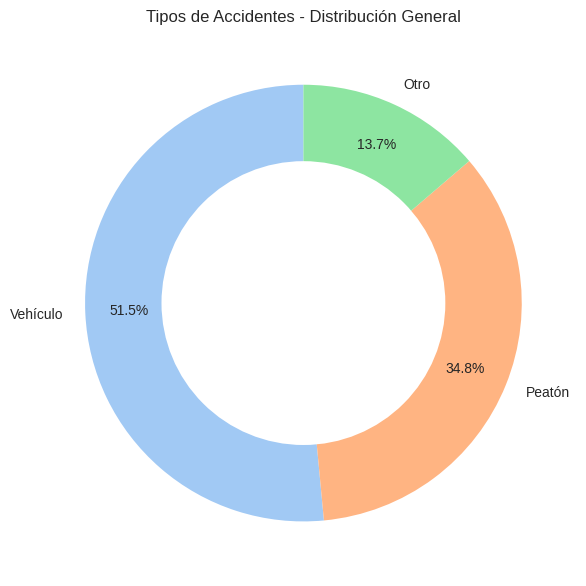

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos
df_modificado = df.copy()
df_modificado['status_type'] = df_modificado['status_type'].replace('Desconocido', 'Otro')
tipo_accidente = df_modificado.groupby('status_type')['count'].sum().reset_index()
tipo_accidente = tipo_accidente.sort_values(by='count', ascending=False)

# Estilo limpio
plt.style.use('seaborn-v0_8-white')
colors = sns.color_palette("pastel", len(tipo_accidente))  # Colores suaves

# Crear gráfico de dona pequeño
plt.figure(figsize=(6, 6))
plt.pie(tipo_accidente['count'], labels=tipo_accidente['status_type'], colors=colors,
        startangle=90, autopct='%1.1f%%', pctdistance=0.8, wedgeprops=dict(width=0.4))

centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Tipos de Accidentes - Distribución General', fontsize=12)
plt.tight_layout()
plt.show()


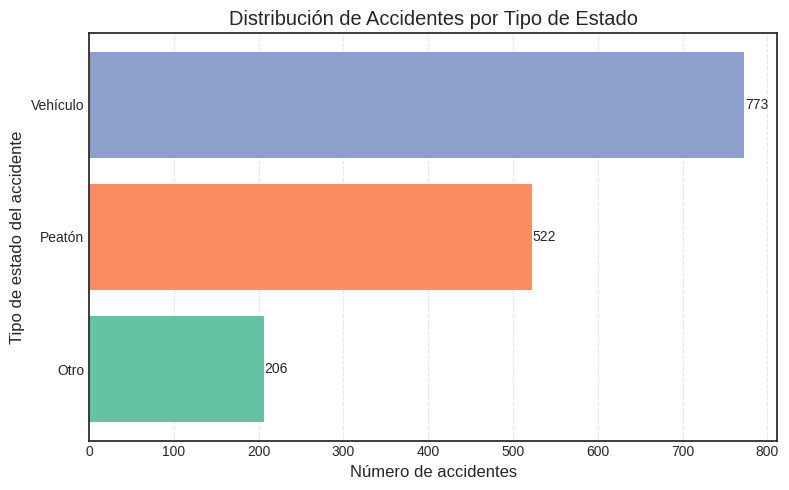

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una copia del dataframe y reemplazar "Desconocido" por "Otro"
df_copy = df.copy()
df_copy['status_type'] = df_copy['status_type'].replace('Desconocido', 'Otro')

# Agrupar por tipo de estado (status_type) y sumar los casos
accident_types = df_copy.groupby('status_type')['count'].sum().sort_values()

# Estilo gráfico
plt.figure(figsize=(8, 5))
colors = sns.color_palette("Set2", len(accident_types))  # Paleta más atractiva
bars = plt.barh(accident_types.index, accident_types.values, color=colors)

# Títulos y etiquetas
plt.xlabel('Número de accidentes')
plt.ylabel('Tipo de estado del accidente')
plt.title('Distribución de Accidentes por Tipo de Estado')

# Etiquetas al final de cada barra
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, int(bar.get_width()), va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


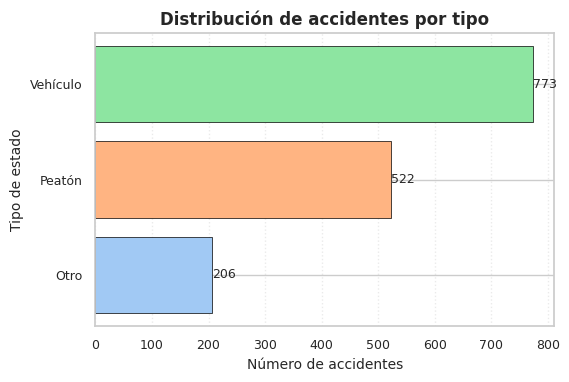

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copia del DataFrame con "Desconocido" reemplazado por "Otro"
df_copy = df.copy()
df_copy['status_type'] = df_copy['status_type'].replace('Desconocido', 'Otro')

# Agrupar por tipo de estado y contar
accident_types = df_copy.groupby('status_type')['count'].sum().sort_values()

# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))  # Más pequeño y compacto

# Usar una paleta más suave y moderna
colors = sns.color_palette("pastel", len(accident_types))

# Gráfico
bars = plt.barh(accident_types.index, accident_types.values, color=colors, edgecolor='black', linewidth=0.5)

# Etiquetas y título estilizados
plt.xlabel('Número de accidentes', fontsize=10)
plt.ylabel('Tipo de estado', fontsize=10)
plt.title('Distribución de accidentes por tipo', fontsize=12, weight='bold')

# Mostrar valores al final de las barras
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())}", va='center', fontsize=9)

plt.tight_layout()
plt.grid(axis='x', linestyle=':', alpha=0.4)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()


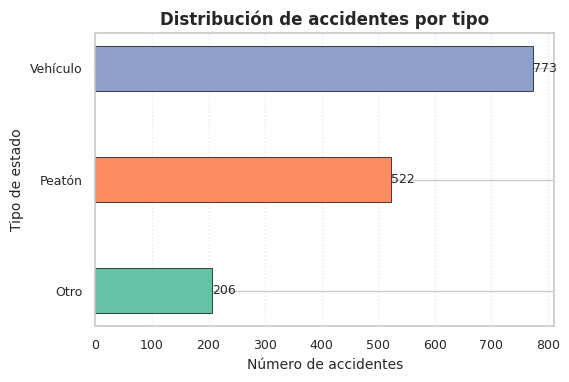

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copia del DataFrame con "Desconocido" reemplazado por "Otro"
df_copy = df.copy()
df_copy['status_type'] = df_copy['status_type'].replace('Desconocido', 'Otro')

# Agrupar por tipo de estado y contar
accident_types = df_copy.groupby('status_type')['count'].sum().sort_values()

# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Colores más vivos
colors = sns.color_palette("Set2", len(accident_types))

# Gráfico con barras más delgadas
bar_height = 0.4  # más delgado que el valor por defecto
bars = plt.barh(accident_types.index, accident_types.values, color=colors, height=bar_height, edgecolor='black', linewidth=0.5)

# Etiquetas y título estilizados
plt.xlabel('Número de accidentes', fontsize=10)
plt.ylabel('Tipo de estado', fontsize=10)
plt.title('Distribución de accidentes por tipo', fontsize=12, weight='bold')

# Mostrar valores al final de las barras
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())}", va='center', fontsize=9)

plt.tight_layout()
plt.grid(axis='x', linestyle=':', alpha=0.4)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()


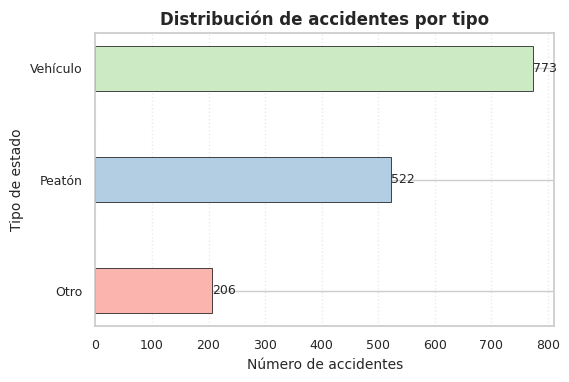

In [50]:

# Copia y reemplazo
df_copy = df.copy()
df_copy['status_type'] = df_copy['status_type'].replace('Desconocido', 'Otro')

# Agrupar
accident_types = df_copy.groupby('status_type')['count'].sum().sort_values()

# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Paleta pastel
colors = sns.color_palette("Pastel1", len(accident_types))

# Barras horizontales delgadas
bars = plt.barh(
    accident_types.index,
    accident_types.values,
    color=colors,
    height=0.4,
    edgecolor='black',
    linewidth=0.5
)

# Etiquetas y título
plt.xlabel('Número de accidentes', fontsize=10)
plt.ylabel('Tipo de estado', fontsize=10)
plt.title('Distribución de accidentes por tipo', fontsize=12, weight='bold')

# Mostrar valores
for bar in bars:
    plt.text(
        bar.get_width() + 1,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.grid(axis='x', linestyle=':', alpha=0.4)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()
